# Preprocessing HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

## Import libraries

In [178]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

In [179]:
colorblind_palette = ['#5ab4ac', '#b2182b', '#2d004b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load datasets

In [180]:
FILE_PATH = r'../../data/01_main'
PLOT_PATH = f'{FILE_PATH}/plots/preprocessing/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

In [181]:
dataset = pd.read_csv(f'{FILE_PATH}/01_pointing_task.csv', index_col=[0])
all_buildings = pd.read_csv(f'{FILE_PATH}/02_all_buildings_list.csv', index_col=[0])
avatar_info = pd.read_csv(f'{FILE_PATH}/03_avatar_info_list.csv', index_col=[0])
starting_locations = pd.read_csv(f'{FILE_PATH}/05_starting_locations_info.csv', index_col=0)
print('Done!')

Done!


### Glimpse at the data

In [182]:
dataset.drop(columns=['Unnamed: 0.1'], inplace=True)
dataset.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,DistanceToParticipant,...,Magnitud_Participant-Pointer,Magnitud_Participant-Building,radians,degrees,atanPointer,atanBuild-Part,atanSubs,rad2degree,AbsolutError2,AbsolutError
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,197.768723,...,181.482199,197.743621,0.468390,26.836743,1.626782,1.358059,0.268723,15.396716,15.396716,15.396716
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,213.475525,...,173.847081,213.345438,0.420196,24.075485,1.497808,1.603186,-0.105378,-6.037733,6.037733,6.037733
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,111.623512,...,66.834707,111.427967,0.929789,53.272987,-3.028520,-3.139266,0.110746,6.345290,6.345290,6.345290
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,111.623512,...,66.829809,111.458707,0.928970,53.226082,-3.075803,-3.139119,0.063316,3.627752,3.627752,3.627752
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,232.765823,...,226.326423,232.651757,0.391448,22.428323,-2.811994,-2.478370,-0.333624,-19.115237,19.115237,19.115237


In [183]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5376 entries, 0 to 5375
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SubjectID                         5376 non-null   int64  
 1   ParticipantPosition_x             5376 non-null   float64
 2   ParticipantPosition_z             5376 non-null   float64
 3   PointerPosition_x                 5376 non-null   float64
 4   PointerPosition_z                 5376 non-null   float64
 5   PointerDirection_x                5376 non-null   float64
 6   PointerDirection_z                5376 non-null   float64
 7   BuildingCenterWorld_z             5376 non-null   float64
 8   BuildingCenterWorld_x             5376 non-null   float64
 9   DistanceToParticipant             5376 non-null   float64
 10  SignedAngle-+1802                 5376 non-null   float64
 11  SignedAngle-+180                  5376 non-null   float64
 12  Signed

In [184]:
dataset.describe()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,DistanceToParticipant,...,Magnitud_Participant-Pointer,Magnitud_Participant-Building,radians,degrees,atanPointer,atanBuild-Part,atanSubs,rad2degree,AbsolutError2,AbsolutError
count,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,...,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000
mean,5794.125000,-2.378522,14.186146,-2.261623,14.268293,-0.032792,-0.027532,9.156256,5.449751,287.944124,...,209.057607,289.890791,0.750239,42.985549,-0.165872,-0.092142,-0.073730,-4.425286,51.753386,51.753386
std,2729.120517,174.510137,137.764169,174.422407,137.620952,0.718588,0.689917,124.332956,190.720498,137.521040,...,78.455589,138.368875,0.671454,38.471461,1.854821,1.831355,1.984493,68.572744,45.198416,45.198416
min,365.000000,-326.978333,-191.062988,-327.328186,-191.155640,-0.999929,-0.999967,-255.873932,-336.362793,21.887957,...,40.304656,21.578343,0.000288,0.016528,-3.141554,-3.139266,-6.176514,-179.881808,0.016541,0.016541
25%,4025.000000,-121.395088,-131.448990,-114.682289,-128.949646,-0.771541,-0.693675,-65.879829,-141.836426,182.710232,...,161.836650,183.315281,0.258260,14.797215,-1.873123,-1.730037,-0.846715,-43.890207,14.939841,14.939841
50%,6191.500000,-15.488754,33.438503,0.958771,38.788414,-0.075334,-0.062775,18.549416,-3.336735,271.197876,...,210.908067,273.814899,0.539794,30.927892,-0.149049,-0.033744,-0.092937,-5.377770,38.355838,38.355838
75%,7998.750000,123.558899,135.198154,123.672617,133.676708,0.690788,0.651221,107.857498,140.723175,382.932549,...,248.997171,385.427885,1.042656,59.739786,1.372440,1.300725,0.606852,31.811184,76.281960,76.281960
max,9502.000000,367.005798,236.020691,367.196594,236.058563,0.999999,0.999944,288.053894,401.768616,728.976196,...,383.849659,738.759520,3.136992,179.736428,3.140580,3.139421,6.258436,179.983386,179.983386,179.983386


In [185]:
all_buildings.head()

,BuildingID,BuildingName,BuildingCenterWorld.x,BuildingCenterWorld.y,BuildingCenterWorld.z,BuildingPositionGlobal.x,BuildingPositionGlobal.y,BuildingPositionGlobal.z,BuildingPositionLocal.x,BuildingPositionLocal.y,...,BuildingLocalScale.z,BuildingForwardDirection.x,BuildingForwardDirection.y,BuildingForwardDirection.z,BuildingUpDirection.x,BuildingUpDirection.y,BuildingUpDirection.z,BuildingRightDirection.x,BuildingRightDirection.y,BuildingRightDirection.z
0,59,Crane_59,-318.127991,26.896717,-167.823914,-313.499451,1.614944,-150.514664,-313.499451,1.614944,...,1.20745,2.423655e-01,-7.277503e-09,9.701850e-01,5.915870e-08,1.000000e+00,-7.277503e-09,0.970185,-5.915870e-08,-0.242366
1,58,BasketballCourt_58,104.339996,-0.440584,-45.689999,104.339996,-3.070000,-45.689999,104.339996,-3.070000,...,1.00000,-6.614817e-01,0.000000e+00,7.499613e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.749961,0.000000e+00,0.661482
2,57,Construction_57,-71.695419,0.739893,-26.238297,-71.803406,0.551138,-26.717417,-0.028043,0.005596,...,1.00000,1.490116e-07,1.000000e+00,-1.639128e-07,7.768201e-01,-2.384186e-07,-6.297227e-01,0.629723,0.000000e+00,0.776820
3,48,TaskBuilding_48,-195.637009,7.350957,-130.434052,-195.637512,-0.000015,-130.434052,-195.637512,130.434067,...,1.00000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000
4,52,TaskBuilding_52,-247.185669,4.570368,54.489395,-247.203369,2.410477,54.642479,-247.203369,-54.642483,...,1.00000,1.147317e-01,-4.165431e-07,-9.933965e-01,2.397451e-08,1.000000e+00,-4.165431e-07,-0.993397,-2.397451e-08,-0.114732


In [186]:
all_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 58
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingID                       56 non-null     int64  
 1   BuildingName                     56 non-null     object 
 2   BuildingCenterWorld.x            56 non-null     float64
 3   BuildingCenterWorld.y            56 non-null     float64
 4   BuildingCenterWorld.z            56 non-null     float64
 5   BuildingPositionGlobal.x         56 non-null     float64
 6   BuildingPositionGlobal.y         56 non-null     float64
 7   BuildingPositionGlobal.z         56 non-null     float64
 8   BuildingPositionLocal.x          56 non-null     float64
 9   BuildingPositionLocal.y          56 non-null     float64
 10  BuildingPositionLocal.z          56 non-null     float64
 11  BuildingRotationGlobal.x         56 non-null     float64
 12  BuildingRotationGlobal.y

In [187]:
all_buildings.describe()

,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.y,BuildingCenterWorld.z,BuildingPositionGlobal.x,BuildingPositionGlobal.y,BuildingPositionGlobal.z,BuildingPositionLocal.x,BuildingPositionLocal.y,BuildingPositionLocal.z,...,BuildingLocalScale.z,BuildingForwardDirection.x,BuildingForwardDirection.y,BuildingForwardDirection.z,BuildingUpDirection.x,BuildingUpDirection.y,BuildingUpDirection.z,BuildingRightDirection.x,BuildingRightDirection.y,BuildingRightDirection.z
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,56.000000
mean,28.839286,8.897565,6.230483,8.850133,8.891293,-0.699142,9.432957,10.172996,-15.121614,-5.762569,...,1.003704,0.092599,7.142840e-02,0.099134,2.409818e-02,8.571428e-01,-1.916140e-02,0.124996,-3.602064e-08,-0.075923
std,16.827226,192.782942,5.453986,124.984650,192.946374,3.398881,124.649720,192.638739,121.578577,24.067370,...,0.027722,0.560289,3.745127e-01,0.734892,2.720723e-01,3.530940e-01,2.654545e-01,0.777820,1.314038e-07,0.625620
min,1.000000,-336.362793,-0.791109,-255.873932,-338.406921,-6.542114,-256.052216,-338.406921,-293.247589,-150.514664,...,1.000000,-0.950611,-1.000000e+00,-1.000000,-9.998724e-01,-2.384186e-07,-9.999999e-01,-1.000000,-4.172325e-07,-0.999872
25%,14.750000,-136.218853,4.085809,-66.197618,-136.462280,-2.367606,-66.331362,-136.462280,-102.433153,-2.426545,...,1.000000,-0.632546,-3.650081e-07,-0.743667,-8.064804e-08,1.000000e+00,-3.809883e-07,-0.746625,-1.117616e-07,-0.631021
50%,28.500000,1.375929,5.244463,9.003581,1.302004,-1.151408,9.077952,2.941159,-10.794964,-1.305926,...,1.000000,0.057366,-9.727868e-08,0.169295,4.079921e-08,1.000000e+00,-1.388518e-07,0.625363,-3.162905e-08,-0.150597
75%,42.250000,143.431297,7.395142,102.297266,146.388565,0.595204,102.433146,146.388565,55.490621,0.422222,...,1.000000,0.579345,0.000000e+00,0.762951,1.512802e-07,1.000000e+00,0.000000e+00,0.774274,6.304895e-08,0.648394
max,59.000000,401.768616,31.293985,288.053894,401.828735,18.361389,293.247559,401.828735,256.052246,18.361364,...,1.207450,0.940934,1.000000e+00,1.000000,9.893244e-01,1.000000e+00,9.417416e-01,1.000000,1.851118e-07,0.989324


In [188]:
avatar_info.head()

,AvatarID,AvatarName,AvatarCenterWorld.x,AvatarCenterWorld.y,AvatarCenterWorld.z,AvatarPositionGlobal.x,AvatarPositionGlobal.y,AvatarPositionGlobal.z,AvatarPositionLocal.x,AvatarPositionLocal.y,...,AvatarLocalScale.z,AvatarForwardDirection.x,AvatarForwardDirection.y,AvatarForwardDirection.z,AvatarUpDirection.x,AvatarUpDirection.y,AvatarUpDirection.z,AvatarRightDirection.x,AvatarRightDirection.y,AvatarRightDirection.z
0,2,02_Cma,-147.664993,3.072653,67.390167,-147.646744,2.345342,67.389999,-351.640015,6.398831,...,1.0,0.000000,0.0,1.000000,0.0,1.0,0.0,1.000000,0.0,0.000000
1,42,42_Sa,65.630707,-1.885010,-52.687607,65.613266,-2.612321,-52.674149,-138.380005,1.441168,...,1.0,-0.605179,0.0,-0.796090,0.0,1.0,0.0,-0.796090,0.0,0.605179
2,36,36_Sa,162.001144,-0.394517,133.271271,162.000000,-1.121828,133.300003,-41.993271,2.931661,...,1.0,0.664752,0.0,0.747064,0.0,1.0,0.0,0.747064,0.0,-0.664752
3,38,38_Sa,150.833649,-1.489311,-43.709518,150.816269,-2.300489,-43.692154,-53.176998,1.753000,...,1.0,0.711973,0.0,0.702207,0.0,1.0,0.0,0.702207,0.0,-0.711973
4,41,41_Sa,92.128632,0.218283,38.293304,92.163269,-0.467581,38.295853,-111.830002,3.585908,...,1.0,0.743769,0.0,-0.668437,0.0,1.0,0.0,-0.668437,0.0,-0.743769


In [189]:
avatar_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AvatarID                       56 non-null     int64  
 1   AvatarName                     56 non-null     object 
 2   AvatarCenterWorld.x            56 non-null     float64
 3   AvatarCenterWorld.y            56 non-null     float64
 4   AvatarCenterWorld.z            56 non-null     float64
 5   AvatarPositionGlobal.x         56 non-null     float64
 6   AvatarPositionGlobal.y         56 non-null     float64
 7   AvatarPositionGlobal.z         56 non-null     float64
 8   AvatarPositionLocal.x          56 non-null     float64
 9   AvatarPositionLocal.y          56 non-null     float64
 10  AvatarPositionLocal.z          56 non-null     float64
 11  AvatarRotationGlobal.x         56 non-null     float64
 12  AvatarRotationGlobal.y         56 non-null     float

In [190]:
avatar_info.describe()

,AvatarID,AvatarCenterWorld.x,AvatarCenterWorld.y,AvatarCenterWorld.z,AvatarPositionGlobal.x,AvatarPositionGlobal.y,AvatarPositionGlobal.z,AvatarPositionLocal.x,AvatarPositionLocal.y,AvatarPositionLocal.z,...,AvatarLocalScale.z,AvatarForwardDirection.x,AvatarForwardDirection.y,AvatarForwardDirection.z,AvatarUpDirection.x,AvatarUpDirection.y,AvatarUpDirection.z,AvatarRightDirection.x,AvatarRightDirection.y,AvatarRightDirection.z
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,9.451360,-0.154723,8.906428,9.479183,-0.852688,8.787668,-194.514089,3.200802,-224.888190,...,1.0,0.152601,-0.000248,0.181139,-0.000041,0.999998,0.000191,0.181141,0.000098,-0.152601
std,16.309506,192.022522,2.171865,120.788425,191.980332,2.207004,120.734400,191.980334,2.207004,120.734400,...,0.0,0.596715,0.001783,0.777812,0.000304,0.000012,0.001847,0.777813,0.000539,0.596715
min,1.000000,-336.241150,-5.256408,-251.694504,-336.241333,-6.063000,-251.780014,-540.234619,-2.009511,-485.455872,...,1.0,-0.961716,-0.013202,-0.999927,-0.002276,0.999913,-0.003719,-0.999927,0.000000,-0.966854
25%,14.750000,-141.405403,-1.509524,-58.579079,-141.419785,-2.255122,-58.426651,-345.413055,1.798367,-292.102509,...,1.0,-0.241996,0.000000,-0.655529,0.000000,1.000000,0.000000,-0.655529,0.000000,-0.745289
50%,28.500000,2.890167,-0.333378,9.498009,2.883270,-1.067159,9.492935,-201.110001,2.986331,-224.182922,...,1.0,0.000000,0.000000,0.468661,0.000000,1.000000,0.000000,0.468661,0.000000,0.000000
75%,42.250000,147.657764,1.529099,111.972822,147.616764,0.888565,111.858717,-56.376500,4.942055,-121.817141,...,1.0,0.745289,0.000000,0.980278,0.000000,1.000000,0.000000,0.980299,0.000000,0.241999
max,56.000000,395.572296,3.703803,230.311523,395.563293,3.100000,230.184113,191.570007,7.153489,-3.491745,...,1.0,0.966854,0.001019,1.000000,0.000000,1.000000,0.013202,1.000000,0.003576,0.961709


In [191]:
starting_locations

,SpawnPointID,SpawnPointName,SpawnPointCenterWorld.x,SpawnPointCenterWorld.y,SpawnPointCenterWorld.z,SpawnPointPositionGlobal.x,SpawnPointPositionGlobal.y,SpawnPointPositionGlobal.z,SpawnPointPositionLocal.x,SpawnPointPositionLocal.y,...,SpawnPointLocalScale.z,SpawnPointForwardDirection.x,SpawnPointForwardDirection.y,SpawnPointForwardDirection.z,SpawnPointUpDirection.x,SpawnPointUpDirection.y,SpawnPointUpDirection.z,SpawnPointRightDirection.x,SpawnPointRightDirection.y,SpawnPointRightDirection.z
0,9,SP_TaskBuilding_9,366.741425,-1.029061,109.221771,366.741425,-1.029061,109.221771,366.730011,-1.810000,...,1.0,0.634623,2.325984e-04,0.772822,-2.700125e-03,0.999995,1.916310e-03,0.772817,3.302850e-03,-0.634621
1,30,SP_TaskBuilding_30,38.822807,0.351428,53.957973,38.822807,0.351428,53.957973,38.820000,0.350000,...,1.0,0.011997,-1.883786e-03,0.999926,-2.700125e-03,0.999995,1.916310e-03,0.999924,2.722915e-03,-0.011992
2,38,SP_TaskBuilding_38,-54.884190,-0.080298,235.924225,-54.884186,-0.080298,235.924240,-54.900002,0.520000,...,1.0,-0.919156,-1.727029e-03,-0.393891,-2.700125e-03,0.999995,1.916310e-03,-0.393885,-2.824940e-03,0.919155
3,7,SP_TaskBuilding_7,-185.620300,-0.395362,-159.597656,-185.620300,-0.395362,-159.597656,-185.610001,-0.200000,...,1.0,-0.500830,3.063527e-04,-0.865546,-2.700125e-03,0.999995,1.916310e-03,-0.865542,-3.296827e-03,0.500826
4,29,SP_TaskBuilding_29,30.083309,-0.475717,177.916245,30.083307,-0.475717,177.916245,30.070000,-0.216000,...,1.0,0.166026,2.101680e-03,-0.986119,-3.791834e-03,0.999992,1.492841e-03,-0.986114,-3.491349e-03,-0.166033
5,20,SP_TaskBuilding_20,195.920258,-1.826742,-80.497787,195.920258,-1.826742,-80.497787,195.919998,-2.510000,...,1.0,-0.635811,-3.195868e-03,0.771838,-2.700125e-03,0.999995,1.916310e-03,0.771840,8.656483e-04,0.635816
6,34,SP_TaskBuilding_34,-46.292664,0.974889,151.395493,-46.292664,0.974889,151.395477,-46.299999,1.390000,...,1.0,0.404591,2.844915e-03,-0.914493,-2.700125e-03,0.999995,1.916310e-03,-0.914494,-1.693924e-03,-0.404597
7,43,SP_TaskBuilding_43,-145.235855,0.976016,-40.267723,-145.235855,0.976016,-40.267727,-145.229996,1.291000,...,1.0,0.683276,3.244148e-03,-0.730153,-2.700125e-03,0.999995,1.916310e-03,-0.730155,-6.621348e-04,-0.683281
8,45,SP_TaskBuilding_45,-142.188049,-1.789833,-184.783508,-142.188049,-1.789833,-184.783508,-142.179993,-1.760000,...,1.0,-0.525191,2.126690e-04,-0.850984,-2.700125e-03,0.999995,1.916310e-03,-0.850980,-3.304193e-03,0.525188
9,25,SP_TaskBuilding_25,103.361137,-4.799697,-182.246994,103.361137,-4.799697,-182.246994,103.360001,-5.428000,...,1.0,-0.199725,1.338425e-03,-0.979851,-2.700125e-03,0.999995,1.916310e-03,-0.979849,-3.028455e-03,0.199720


In [192]:
starting_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SpawnPointID                       28 non-null     int64  
 1   SpawnPointName                     28 non-null     object 
 2   SpawnPointCenterWorld.x            28 non-null     float64
 3   SpawnPointCenterWorld.y            28 non-null     float64
 4   SpawnPointCenterWorld.z            28 non-null     float64
 5   SpawnPointPositionGlobal.x         28 non-null     float64
 6   SpawnPointPositionGlobal.y         28 non-null     float64
 7   SpawnPointPositionGlobal.z         28 non-null     float64
 8   SpawnPointPositionLocal.x          28 non-null     float64
 9   SpawnPointPositionLocal.y          28 non-null     float64
 10  SpawnPointPositionLocal.z          28 non-null     float64
 11  SpawnPointRotationGlobal.x         28 non-null     float64
 

In [193]:
starting_locations.describe()

,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.y,SpawnPointCenterWorld.z,SpawnPointPositionGlobal.x,SpawnPointPositionGlobal.y,SpawnPointPositionGlobal.z,SpawnPointPositionLocal.x,SpawnPointPositionLocal.y,SpawnPointPositionLocal.z,...,SpawnPointLocalScale.z,SpawnPointForwardDirection.x,SpawnPointForwardDirection.y,SpawnPointForwardDirection.z,SpawnPointUpDirection.x,SpawnPointUpDirection.y,SpawnPointUpDirection.z,SpawnPointRightDirection.x,SpawnPointRightDirection.y,SpawnPointRightDirection.z
count,28.00000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.0,28.000000,28.000000,28.000000,2.800000e+01,28.000000,2.800000e+01,28.000000,28.000000,28.000000
mean,29.50000,-2.383237,-0.709571,14.352128,-2.383237,-0.709571,14.352127,-2.386105,-0.675629,14.353289,...,1.0,-0.233701,-0.002826,-0.003459,-3.297123e-03,0.999912,4.080246e-03,-0.003376,-0.000956,0.233715
std,17.64569,177.731511,1.972548,140.328744,177.731510,1.972548,140.328746,177.727034,2.395919,140.327827,...,0.0,0.534446,0.012823,0.833415,3.518654e-03,0.000439,1.191470e-02,0.833505,0.003038,0.534452
min,1.00000,-326.726471,-4.799697,-190.505417,-326.726471,-4.799697,-190.505432,-326.720001,-5.428000,-190.500000,...,1.0,-0.919156,-0.067415,-0.986119,-2.102448e-02,0.997674,-1.627830e-10,-0.986114,-0.010114,-0.703647
25%,17.00000,-121.291481,-1.900057,-131.151398,-121.291475,-1.900057,-131.151398,-121.284998,-2.412500,-131.139996,...,1.0,-0.641869,-0.002062,-0.755909,-2.700125e-03,0.999995,1.916310e-03,-0.755906,-0.003268,-0.050502
50%,32.00000,-15.450604,-0.552892,33.614385,-15.450604,-0.552892,33.614386,-15.449999,-0.910000,33.600171,...,1.0,-0.473126,-0.000481,-0.406772,-2.700125e-03,0.999995,1.916310e-03,-0.406766,-0.000759,0.473315
75%,43.25000,123.432852,0.780412,135.329144,123.432846,0.780412,135.329144,123.431021,1.023925,135.345005,...,1.0,0.050504,0.000364,0.828546,-2.700125e-03,0.999995,1.916310e-03,0.828546,0.001307,0.641872
max,58.00000,366.741425,2.588058,235.924225,366.741425,2.588058,235.924240,366.730011,3.320000,235.919998,...,1.0,0.703650,0.003257,0.999972,-1.324667e-10,1.000000,6.484631e-02,0.999970,0.003303,0.919155


Check for the number of participants

In [194]:
subj_ids = dataset.SubjectID.unique()
print(f' Subject IDs: {subj_ids}\n',
      f'Number of participants: {len(subj_ids)}')

 Subject IDs: [ 365 1754 2258 3572 4176 4623 5238 5741 6642 7093 7264 7842 8469 8695
 9472 9502]
 Number of participants: 16


## Clean dataframes

Remove redundant variables

In [204]:
df_cleaned = dataset.drop(columns=[
    'AvatarPresence',
    'meaningfulBuilding',
    'AvatarPresenceCategory',
    'Context',
    'PointingTargetCondition',
    'vector_PartPos',
    'vector_BuildingPos',
    'vector_PointerPos',
    'Vector_Participant-Building',
    'Vector_Participant-Pointer',
    'Dot_Pointer-Building-Participant',
    'Magnitud_Participant-Pointer',
    'Magnitud_Participant-Building',
    'SignedAngle-+180',
    'SignedAngle360',
    'Trials',
    'DistanceToParticipant',
    'radians',
    'degrees',
    'PointingTargetId',
    'PointingTaskStartingLocations',
    'StartPointID',
    'building-Participant_x',
    'building-Participant_z',
    'atanPointer',
    'atanBuild-Part',
    'atanSubs',
    'rad2degree',
    'AbsolutError2',
    'AbsolutError',
    'SignedAngle-+1802',
    'Name'

])

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,Agent,avatarID,meaningful,TrialID,ImageName,TimeDelta,RT,TimeOut,TimeStampBegin,TimeStampEnd
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,True,46,False,1,46_Sa,0 days 00:00:25.825714432,25.825715,False,2021-11-18 10:22:23.050529792,2021-11-18 10:22:48.876244224
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,True,46,False,78,46_SaNo,0 days 00:00:04.799789312,4.799789,False,2021-11-18 10:31:54.923360256,2021-11-18 10:31:59.723149568
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,True,46,False,88,46_Sa,0 days 00:00:04.638590208,4.638590,False,2021-11-18 10:32:56.289441792,2021-11-18 10:33:00.928032000
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,True,46,False,95,46_SaNo,0 days 00:00:02.361455104,2.361455,False,2021-11-18 10:33:26.974466304,2021-11-18 10:33:29.335921408
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,True,46,False,131,46_SaNo,0 days 00:00:05.975303680,5.975304,False,2021-11-18 10:38:16.509860608,2021-11-18 10:38:22.485164288


In [203]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5376 entries, 0 to 5375
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SubjectID                         5376 non-null   int64  
 1   ParticipantPosition_x             5376 non-null   float64
 2   ParticipantPosition_z             5376 non-null   float64
 3   PointerPosition_x                 5376 non-null   float64
 4   PointerPosition_z                 5376 non-null   float64
 5   PointerDirection_x                5376 non-null   float64
 6   PointerDirection_z                5376 non-null   float64
 7   BuildingCenterWorld_z             5376 non-null   float64
 8   BuildingCenterWorld_x             5376 non-null   float64
 9   DistanceToParticipant             5376 non-null   float64
 10  SignedAngle-+1802                 5376 non-null   float64
 11  SignedAngle-+180                  5376 non-null   float64
 12  Signed

Join `building center` values to the df_cleaned

It was used for the old dataframe

In [ ]:
# df_cleaned = (
#     pd.merge(
#     df_cleaned,
#     all_buildings[['BuildingID', 'BuildingCenterWorld.x', 'BuildingCenterWorld.z']],
#     left_on='PointingTargetBuildingId',
#     right_on='BuildingID',
#     how='left')
#         .drop(columns=['PointingTargetBuildingId'])
# )
#
# df_cleaned.head()

Remove trials with time out true

In [205]:
len_all = len(df_cleaned)

df_cleaned = df_cleaned.query('TimeOut==False').reset_index(drop=True)

print(f'A total of {len_all - len(df_cleaned)} trial(s) are removed due to maximum time running out before the selection of the direction.')

A total of 17 trial(s) are removed due to maximum time running out before the selection of the direction.


## Enumerate starting locations

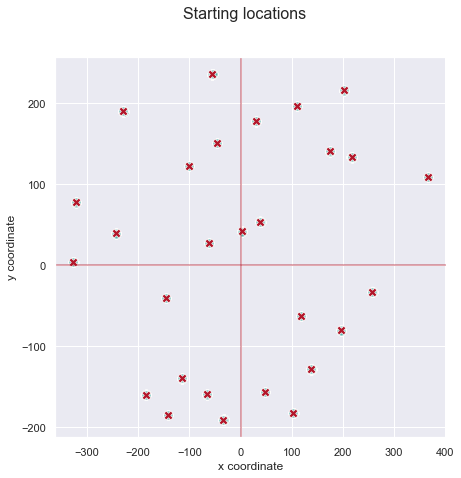

In [207]:
_, _ = plt.subplots(figsize=(7,7))

sns.scatterplot(
    data=df_cleaned,
    x='ParticipantPosition_x',
    y='ParticipantPosition_z',
    s=80
).set(xlabel='x coordinate', ylabel='y coordinate')

sns.scatterplot(
    data=starting_locations,
    x='SpawnPointPositionGlobal.x',
    y='SpawnPointPositionGlobal.z',
    s=80,
    marker='X',
    color=colorblind_palette[1]
)

plt.suptitle(t='Starting locations', size=16)
plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)

plt.savefig(f'{PLOT_PATH}/starting_locations_original.png', bbox_inches='tight', dpi=90)

plt.show()

In [208]:
X = df_cleaned[['ParticipantPosition_x', 'ParticipantPosition_z']].values
kmeans = KMeans(n_clusters=28, init='k-means++', random_state=0)
df_cleaned['starting_loc'] = kmeans.fit_predict(X) + 1
df_cleaned.starting_loc.describe()

count    5359.000000
mean       14.503639
std         8.075646
min         1.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        28.000000
Name: starting_loc, dtype: float64

In [209]:
X_start = starting_locations[['SpawnPointCenterWorld.x', 'SpawnPointCenterWorld.z']].values
starting_locations['starting_loc'] = kmeans.predict(X_start) + 1
starting_locations.starting_loc.describe()

count    28.000000
mean     14.500000
std       8.225975
min       1.000000
25%       7.750000
50%      14.500000
75%      21.250000
max      28.000000
Name: starting_loc, dtype: float64

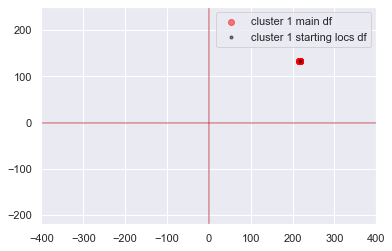

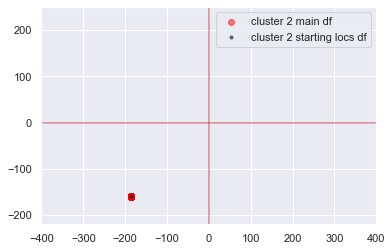

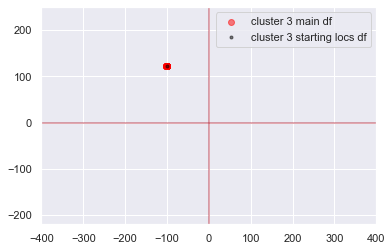

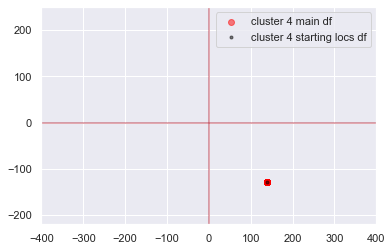

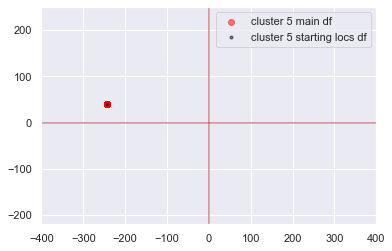

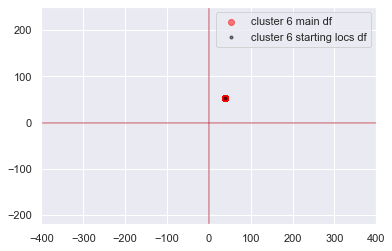

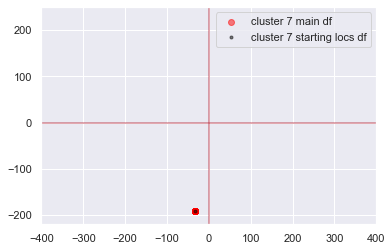

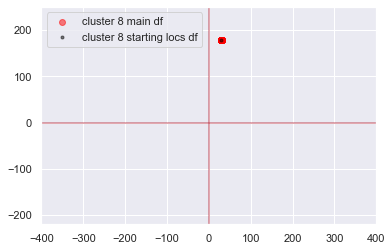

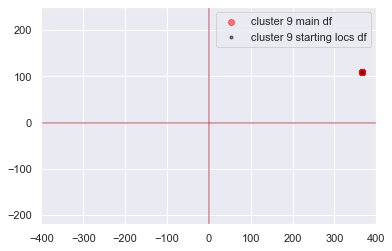

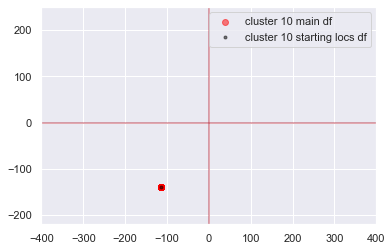

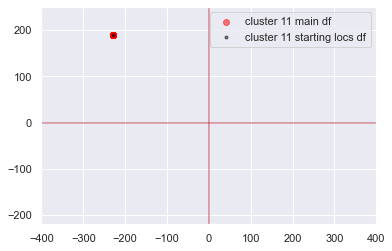

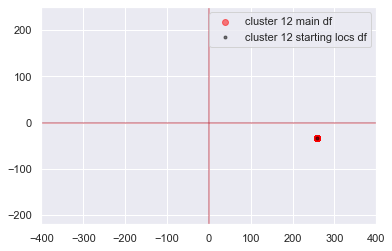

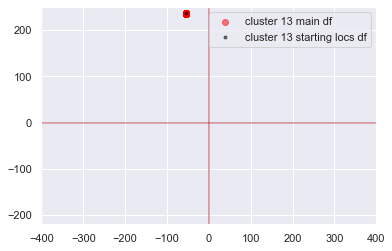

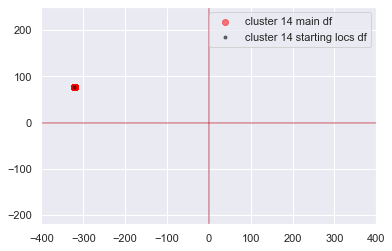

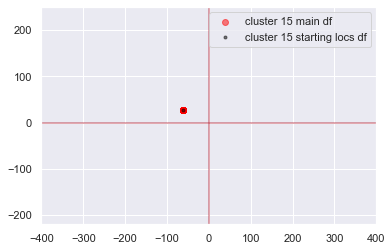

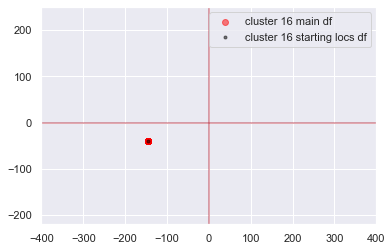

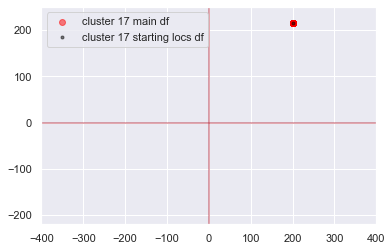

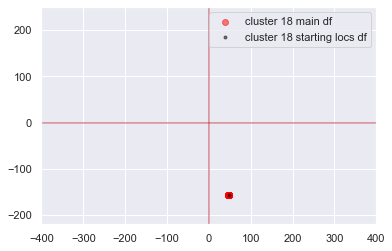

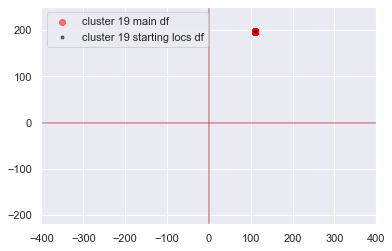

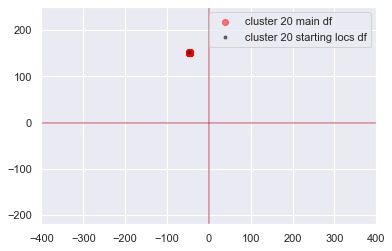

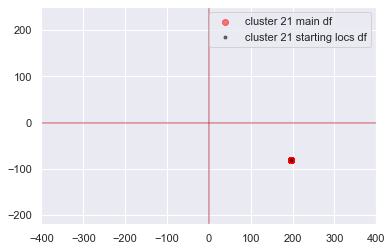

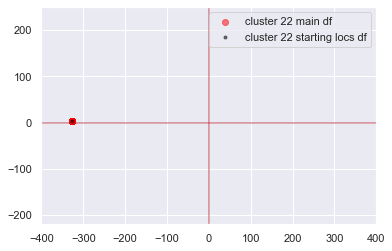

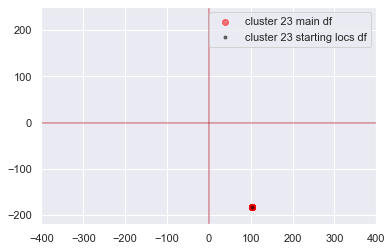

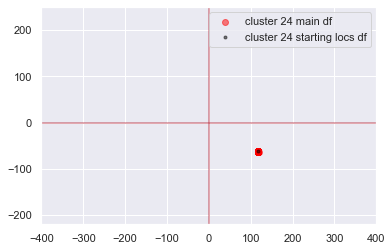

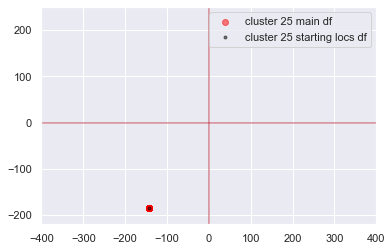

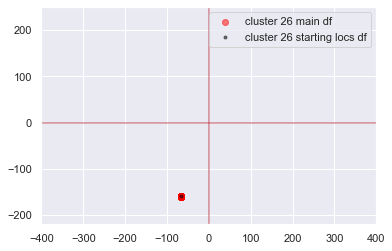

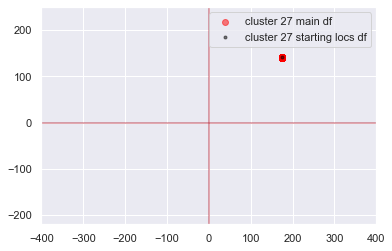

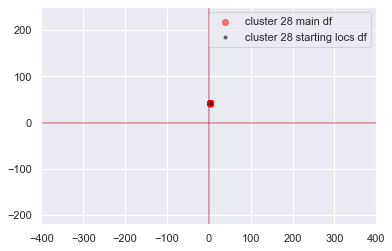

In [210]:
y_kmeans = df_cleaned.starting_loc
y_kmeans2 = starting_locations.starting_loc

for i in range(1, len(y_kmeans.unique())+1):
    fig, ax = plt.subplots()
    ax.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], label=f'cluster {i} main df', color='red', alpha=.5)
    ax.scatter(X_start[y_kmeans2==i,0], X_start[y_kmeans2==i,1], label=f'cluster {i} starting locs df', marker='.', color='black', alpha=.5)
    # ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 8, marker='s', c='cyan', label='cluster centroid')
    plt.legend()
    plt.axvline(x=0, color=colorblind_palette[1], alpha=.5)
    plt.axhline(y=0, color=colorblind_palette[1], alpha=.5)
    plt.setp(ax, ylim=(-220, 250), xlim=(-400, 400))
    plt.show()


Join dataframes

In [212]:
df_cleaned = (
    pd.merge(
        df_cleaned,
        starting_locations[['starting_loc', 'SpawnPointName', 'SpawnPointID', 'SpawnPointCenterWorld.x', 'SpawnPointCenterWorld.z']],
        left_on='starting_loc',
        right_on='starting_loc',
        how='left')
)

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,Agent,...,TimeDelta,RT,TimeOut,TimeStampBegin,TimeStampEnd,starting_loc,SpawnPointName,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.z
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,True,...,0 days 00:00:25.825714432,25.825715,False,2021-11-18 10:22:23.050529792,2021-11-18 10:22:48.876244224,10,SP_TaskBuilding_44,44,-114.325958,-139.534698
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,True,...,0 days 00:00:04.799789312,4.799789,False,2021-11-18 10:31:54.923360256,2021-11-18 10:31:59.723149568,26,SP_TaskBuilding_36,36,-65.603775,-159.510620
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,True,...,0 days 00:00:04.638590208,4.638590,False,2021-11-18 10:32:56.289441792,2021-11-18 10:33:00.928032000,6,SP_TaskBuilding_30,30,38.822807,53.957973
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,True,...,0 days 00:00:02.361455104,2.361455,False,2021-11-18 10:33:26.974466304,2021-11-18 10:33:29.335921408,6,SP_TaskBuilding_30,30,38.822807,53.957973
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,True,...,0 days 00:00:05.975303680,5.975304,False,2021-11-18 10:38:16.509860608,2021-11-18 10:38:22.485164288,19,SP_TaskBuilding_19,19,110.677322,197.029724


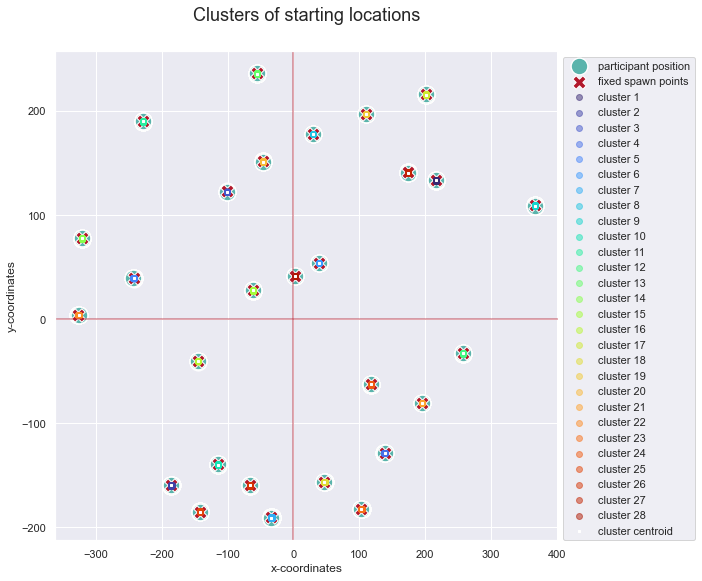

In [213]:
fig, ax = plt.subplots(figsize=(9, 9))
y_kmeans = df_cleaned.starting_loc

sns.scatterplot(
    data=df_cleaned,
    x='ParticipantPosition_x',
    y='ParticipantPosition_z',
    s=280,
    label='participant position'
).set(xlabel='x coordinate', ylabel='y coordinate')

sns.scatterplot(
    data=starting_locations,
    x='SpawnPointPositionGlobal.x',
    y='SpawnPointPositionGlobal.z',
    s=180,
    marker='X',
    color=colorblind_palette[1],
    label='fixed spawn points'
)


for i in range(1, len(y_kmeans.unique())+1):
    ax.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], label=f'cluster {i}', color=plt.cm.turbo(i/30), alpha=.5)
ax.axvline(x=0, alpha=.5, color=colorblind_palette[1])
ax.axhline(y=0, alpha=.5, color=colorblind_palette[1])
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 8, marker='s', c='white', label='cluster centroid')
ax.set_title('Clusters of starting locations', size=18, y=1.05)
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.legend(bbox_to_anchor=(1, 1))

plt.savefig(f'{PLOT_PATH}/starting_locations_kmeans.png', bbox_inches='tight', dpi=90)

plt.show()

## Calculate angle with body `(participant position)` as origin

#### Translate the ` building center ` by ` participant's position ` to make ` body position ` the origin

In [215]:
df_cleaned['moved_target_position_x'] = df_cleaned['BuildingCenterWorld_x'] - df_cleaned.ParticipantPosition_x
df_cleaned['moved_target_position_z'] = df_cleaned['BuildingCenterWorld_z'] - df_cleaned.ParticipantPosition_z

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,Agent,...,TimeOut,TimeStampBegin,TimeStampEnd,starting_loc,SpawnPointName,SpawnPointID,SpawnPointCenterWorld.x,SpawnPointCenterWorld.z,moved_target_position_x,moved_target_position_z
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,True,...,False,2021-11-18 10:22:23.050529792,2021-11-18 10:22:48.876244224,10,SP_TaskBuilding_44,44,-114.325958,-139.534698,41.750862,193.285812
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,True,...,False,2021-11-18 10:31:54.923360256,2021-11-18 10:31:59.723149568,26,SP_TaskBuilding_36,36,-65.603775,-159.510620,-6.909050,213.233536
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,True,...,False,2021-11-18 10:32:56.289441792,2021-11-18 10:33:00.928032000,6,SP_TaskBuilding_30,30,38.822807,53.957973,-111.427666,-0.259201
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,True,...,False,2021-11-18 10:33:26.974466304,2021-11-18 10:33:29.335921408,6,SP_TaskBuilding_30,30,38.822807,53.957973,-111.458366,-0.275711
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,True,...,False,2021-11-18 10:38:16.509860608,2021-11-18 10:38:22.485164288,19,SP_TaskBuilding_19,19,110.677322,197.029724,-183.332466,-143.234238


#### Calculate the `angle difference` between the `derived direction` and `derived target` points and the `x_axis`

In [216]:
df_cleaned['target_to_x_180'] = np.rad2deg(np.arctan2(df_cleaned.moved_target_position_z, df_cleaned.moved_target_position_x))
df_cleaned['dir_to_x_180'] = np.rad2deg(np.arctan2(df_cleaned.PointerDirection_z, df_cleaned.PointerDirection_x))

df_cleaned[['dir_to_x_180', 'target_to_x_180']].describe()

,dir_to_x_180,target_to_x_180
count,5359.000000,5359.000000
mean,-9.532063,-5.235598
std,106.303247,104.995076
min,-179.997813,-179.866720
25%,-107.494017,-99.128809
50%,-8.619934,-1.933544
75%,78.647433,74.728335
max,179.942005,179.875547


## Calculate angle deviation between the selected direction and the target

Convert the angular `difference from the x-axis` of `target` and `direction` to `360 degree`

In [217]:
df_cleaned['target_to_x_360'] = np.where(df_cleaned.target_to_x_180 < 0,
                                         360 + df_cleaned.target_to_x_180,
                                         df_cleaned.target_to_x_180
)

df_cleaned['dir_to_x_360'] = np.where(df_cleaned.dir_to_x_180 < 0,
                                      360 + df_cleaned.dir_to_x_180,
                                      df_cleaned.dir_to_x_180
)

df_cleaned[['target_to_x_360','dir_to_x_360']].describe()

,target_to_x_360,dir_to_x_360
count,5359.000000,5359.000000
mean,179.366006,178.697084
std,108.328714,102.455145
min,0.063520,0.117542
25%,80.800486,87.212879
50%,184.139415,186.945756
75%,266.410914,260.073945
max,359.773355,359.968134


## Calculate the `signed angular difference` between `selected direction` and the `target`

In [218]:
df_cleaned['final_180_angles'] = (
    ((df_cleaned.dir_to_x_360 - df_cleaned.target_to_x_360) + 180) % 360 - 180
)

df_cleaned.final_180_angles.describe()

count    5359.000000
mean       -4.363641
std        68.464680
min      -179.881808
25%       -43.681602
50%        -5.301192
75%        31.826478
max       179.983386
Name: final_180_angles, dtype: float64

## Convert the `signed angular difference` between `selected direction` and the `target` to `360 degree` angles

In [219]:
df_cleaned['final_360_angles'] = np.where(
    df_cleaned.final_180_angles < 0,
    360 + df_cleaned.final_180_angles,
    df_cleaned.final_180_angles
)

df_cleaned.final_360_angles.describe()

count    5359.000000
mean      195.285547
std       135.192313
min         0.034764
25%        47.564940
50%       241.968709
75%       327.139052
max       359.983459
Name: final_360_angles, dtype: float64

Round the angles

In [220]:
df_cleaned['rounded_180_angles'] = round(df_cleaned.final_180_angles)
df_cleaned['rounded_360_angles'] = round(df_cleaned.final_360_angles)

In [221]:
df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,BuildingCenterWorld_z,BuildingCenterWorld_x,Agent,...,moved_target_position_x,moved_target_position_z,target_to_x_180,dir_to_x_180,target_to_x_360,dir_to_x_360,final_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,True,...,41.750862,193.285812,77.811048,93.207763,77.811048,93.207763,15.396716,15.396716,15.0,15.0
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,True,...,-6.909050,213.233536,91.855810,85.818077,91.855810,85.818077,-6.037733,353.962267,-6.0,354.0
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,True,...,-111.427666,-0.259201,-179.866720,-173.521430,180.133280,186.478570,6.345290,6.345290,6.0,6.0
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,True,...,-111.458366,-0.275711,-179.858270,-176.230517,180.141730,183.769483,3.627752,3.627752,4.0,4.0
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,True,...,-183.332466,-143.234238,-142.000152,-161.115388,217.999848,198.884612,-19.115237,340.884763,-19.0,341.0


Add absolute 180 degree angles

In [222]:
df_cleaned['absolute_180_angles'] = np.abs(df_cleaned.final_180_angles)
df_cleaned.absolute_180_angles.describe()

count    5359.000000
mean       51.662167
std        45.132911
min         0.016541
25%        14.918286
50%        38.305236
75%        75.959616
max       179.983386
Name: absolute_180_angles, dtype: float64

In [223]:
df_cleaned = df_cleaned.rename(columns = {'SubjectID'               : 'subject_id',
                                          'ParticipantPosition_x'   : 'body_pos_x',
                                          'ParticipantPosition_z'   : 'body_pos_z',
                                          'PointerPosition_x'       : 'pointer_pos_x',
                                          'PointerPosition_z'       : 'pointer_pos_z',
                                          'PointerDirection_x'      : 'pointer_dir_x',
                                          'PointerDirection_z'      : 'pointer_dir_z',
                                          'PointingTargetName'      : 'target_game_object_name',
                                          'Agent'                   : 'avatar_presence',
                                          'avatarID'                : 'avatar_id',
                                          'TrialID'                 : 'trial_id',
                                          'ImageName'               : 'image_name',
                                          'TimeDelta'               : 'time_delta',
                                          'TimeOut'                 : 'time_out',
                                          'TimeStampBegin'          : 'timestamp_begin',
                                          'TimeStampEnd'            : 'timestamp_end',
                                          'BuildingID'              : 'building_id',
                                          'BuildingCenterWorld_x'   : 'building_center_x',
                                          'BuildingCenterWorld_z'   : 'building_center_z',
                                          'SpawnPointName'          : 'starting_loc_name',
                                          'SpawnPointID'            : 'starting_loc_id',
                                          'SpawnPointCenterWorld.x' : 'starting_loc_x',
                                          'SpawnPointCenterWorld.z' : 'starting_loc_z',
                                          'starting_loc'            : 'kmeans_categories'
})

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 0 to 5358
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   subject_id               5359 non-null   int64  
 1   body_pos_x               5359 non-null   float64
 2   body_pos_z               5359 non-null   float64
 3   pointer_pos_x            5359 non-null   float64
 4   pointer_pos_z            5359 non-null   float64
 5   pointer_dir_x            5359 non-null   float64
 6   pointer_dir_z            5359 non-null   float64
 7   building_center_z        5359 non-null   float64
 8   building_center_x        5359 non-null   float64
 9   avatar_presence          5359 non-null   bool   
 10  avatar_id                5359 non-null   int64  
 11  meaningful               5359 non-null   bool   
 12  trial_id                 5359 non-null   int64  
 13  image_name               5359 non-null   object 
 14  time_delta              

In [224]:
df_cleaned.to_csv(f'{FILE_PATH}/07_preprocessed.csv', index=False)
del df_cleaned